# 1. Introduction

## 1.1 Data Description
The dataset contains student's math, reading, and writing score. The student's is grouped into 5 groups. There are also information about education level of student's parents, student's lunch, and either the students complete the preparation test or not.

## 1.2 Objective
Student's score are various depending on several variables. We will analysis student's score data by using EDA, bootstraping, and hypothesis testing. The results of the analysis will show the variables which affect student's score.

# 2. Data Analysis

## 2.1 Pre-Processing Data
First, we need to import packages we need and import the file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('datasets/StudentsPerformance.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


From the information above, we see that we have quite good data without null value. But we need to rename the columns' name and data types for easeness of data processing. We also need to count final score which is the average of math, reading, and writing score.

In [2]:
data = data.rename(columns={'race/ethnicity':'group', 'parental level of education':'p_edu', 'test preparation course':'t_prep', 'math score':'math', 'reading score':'read', 'writing score':'write'})
data['final'] = data.mean(numeric_only=True, axis=1).round(2)
data['gender'] = data.gender.astype('category')
data['group'] = data.group.astype('category')
data['p_edu'] = data.p_edu.astype('category')
data['t_prep'] = data.t_prep.astype('category')
data['lunch'] = data.lunch.astype('category')
print(data.info())
print(data.head())
print(data.describe())
print('Group : ', data.group.unique())
print("Parents' education level : ", data.p_edu.unique())
print('Test preparation : ', data.t_prep.unique())
print('lunch : ', data.lunch.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
gender    1000 non-null category
group     1000 non-null category
p_edu     1000 non-null category
lunch     1000 non-null category
t_prep    1000 non-null category
math      1000 non-null int64
read      1000 non-null int64
write     1000 non-null int64
final     1000 non-null float64
dtypes: category(5), float64(1), int64(3)
memory usage: 36.9 KB
None
   gender    group               p_edu         lunch     t_prep  math  read  \
0  female  group B   bachelor's degree      standard       none    72    72   
1  female  group C        some college      standard  completed    69    90   
2  female  group B     master's degree      standard       none    90    95   
3    male  group A  associate's degree  free/reduced       none    47    57   
4    male  group C        some college      standard       none    76    78   

   write  final  
0     74  72.67  
1     88  82.33  
2     93  

C:\Users\asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Final Score')

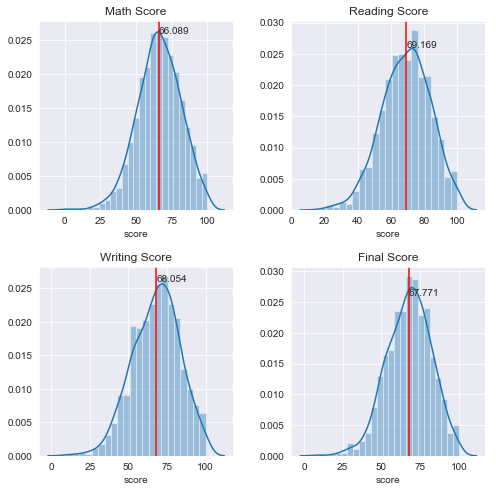

In [9]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(8,8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2,2,1)
ax1 = sns.distplot(data.math, axlabel='score')
plt.axvline(data.math.mean(), color='r')
ax1.annotate(s=data.math.mean(), xy=(data.math.mean(), 0.026))
plt.title('Math Score')

plt.subplot(2,2,2)
ax2 = sns.distplot(data.read, axlabel='score')
plt.axvline(data.read.mean(), color='r')
ax2.annotate(s=data.read.mean(), xy=(data.read.mean(), 0.026))
plt.title('Reading Score')

plt.subplot(2,2,3)
ax3 = sns.distplot(data.write, axlabel='score')
plt.axvline(data.write.mean(), color='r')
ax3.annotate(s=data.write.mean(), xy=(data.write.mean(), 0.026))
plt.title('Writing Score')

plt.subplot(2,2,4)
ax4 = sns.distplot(data.final, axlabel='score')
plt.axvline(data.final.mean(), color='r')
ax4.annotate(s=round(data.final.mean(),3), xy=(data.final.mean(), 0.026))
plt.title('Final Score')

From the summary and graph above, we see math, reading, writing, and final score have normal distribution. They have mean roughly around 67 and standard deviation around 15. So, we have well-distributed data.

## 2.1 Exploratory Data Analysis (EDA)
We want to see students' final score accross different groups

Text(0.5, 1.0, 'Final score distribution based on group')

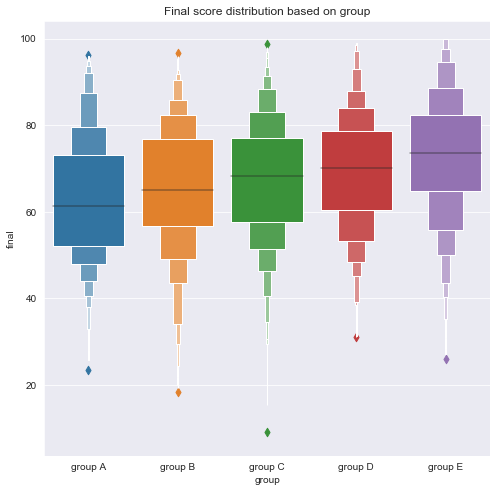

In [10]:
plt.figure(figsize=(8,8))
sns.boxenplot(data=data, x='group', y='final')
plt.title('Final score distribution based on group')

The graph above shows that group E has the highest average final score while group A has the lowest average final score. We need to find what makes this two groups have significant differents in performance. There are three variables that maybe affect students performance. They are lunch, test preparations, and parents' education level. 

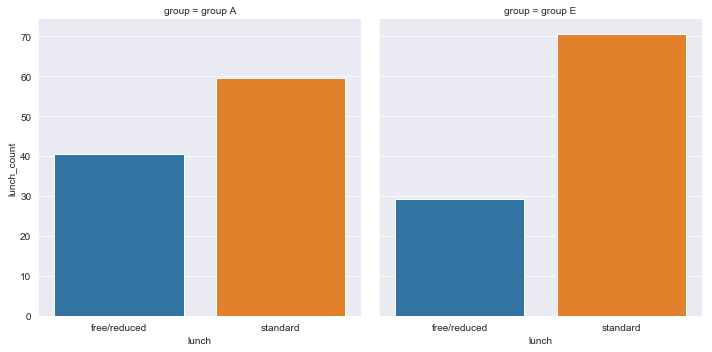

In [15]:
data['lunch_count'] = data['lunch']
data_1 = data.groupby(['group', 'lunch']).lunch_count.count()
data_1_ = data_1.groupby(level=0).apply(lambda x : 100*x/float(x.sum())).reset_index()
sns.catplot(data=data_1_, x='lunch', y='lunch_count', col='group', col_order=['group A', 'group E'], kind='bar', sharex=False)

We see that group E has higher standard students' lunch than group A. This may affect students' performance. We will analyze this variable later.

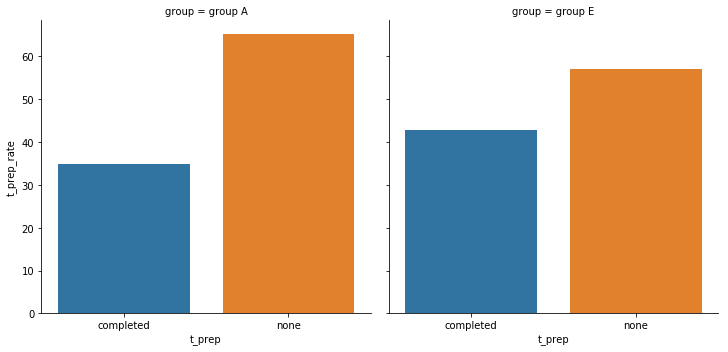

In [23]:
data['t_prep_rate'] = data['t_prep']
data_2 = data.groupby(['group', 't_prep']).t_prep_rate.count()
data_2_ = data_2.groupby(level=0).apply(lambda x : 100*x/float(x.sum())).reset_index()
sns.catplot(data=data_2_, x='t_prep', y='t_prep_rate', col='group', col_order=['group A', 'group E'], col_wrap=3, kind='bar', sharex=False)

We also see that group E has higher proportions with students completed the test preparations rather than group A. This also may affect students' performance. We will analyze this variable later.

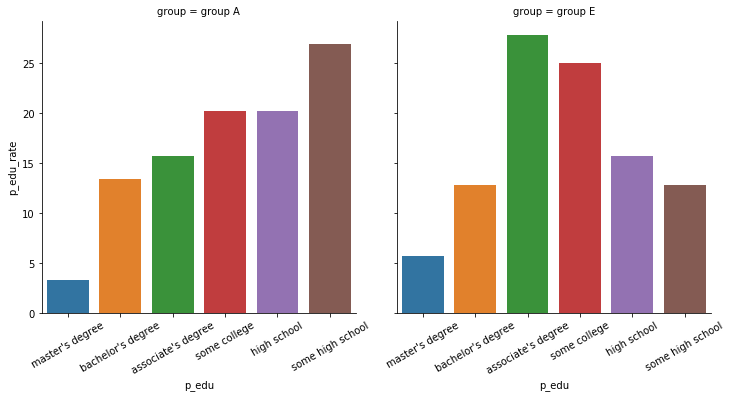

In [24]:
data['p_edu_rate'] = data['p_edu']
data_3 = data.groupby(['group', 'p_edu']).p_edu_rate.count()
data_3_ = data_3.groupby(level=0).apply(lambda x : 100*x/float(x.sum())).reset_index()
y = sns.catplot(data=data_3_, x='p_edu', order=["master's degree", "bachelor's degree", "associate's degree", 'some college', 'high school', 'some high school'], y='p_edu_rate', col='group', col_order=['group A', 'group E'], col_wrap=3, kind='bar', sharex=False)
y.set_xticklabels(rotation=30)

The highest parents' education level proportions of group E is bachelor's degree while group A is only some high school. This may affect students' performance too. We will analyze this variable later. 

## 2.2 Statistical Analysis
We want to analyze the differences of students' final score based-on parents' education level, lunch, and test preparation. We will analyze them by using graphical analysis, bootstraping, and hypothesis testing.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


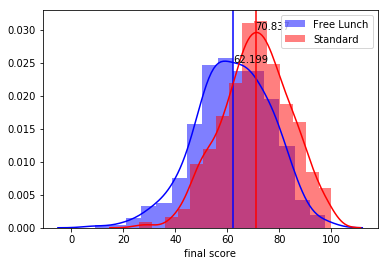

In [3]:
free = data[data['lunch'] == 'free/reduced']
standard = data[data['lunch'] == 'standard']

ax1 = sns.distplot(free.final, axlabel='final score', color='b', hist_kws=dict(alpha=0.5), label='Free Lunch', bins=15)
plt.axvline(round(free.final.mean(),2), color='b')
ax1.annotate(s=round(free.final.mean(),3), xy=(free.final.mean(), 0.025))
ax2 = sns.distplot(standard.final, axlabel='final score', color='r', hist_kws=dict(alpha=0.5), label='Standard', bins=15)
plt.axvline(round(standard.final.mean(),2), color='r')
ax1.annotate(s=round(standard.final.mean(),3), xy=(standard.final.mean(), 0.03))
plt.legend()

We see that students with standard lunch has higher final score mean and distribution. This implies that lunch has affects to students' final score. To make sure this is not a random event, we use bootstraping methods to count p-value.

In [5]:
final_mean = data.final.mean()
free_mean = free.final.mean()
standard_mean = standard.final.mean()
lunch_diff = free_mean - standard_mean

free_shifted = free.final - free_mean + final_mean
standard_shifted = standard.final - standard_mean + final_mean

lunch_diff_shifted = []
for i in range(3000):
    free_samp = free_shifted.sample(frac=1, replace=True)
    standard_samp = standard_shifted.sample(frac=1, replace=True)
    lunch_diff_shifted.append(free_samp.mean() - standard_samp.mean())
    
p_val = np.sum(np.array(lunch_diff_shifted) <= lunch_diff)/len(lunch_diff_shifted)
print('Lunch final score different', round(lunch_diff,2))
print('Lunch P-Value : ', p_val)

Lunch final score different -8.64
Lunch P-Value :  0.0


Under the null hypothesis, they have the same mean. In this case, we get 0 p-value for having mean final score different -8,64. This implies that there is an extremely small chance they have different final score is a random event.

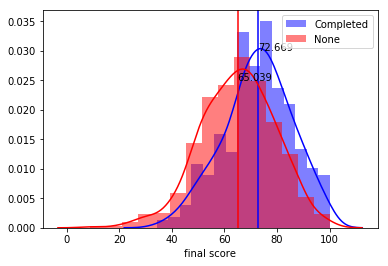

In [6]:
completed = data[data['t_prep'] == 'completed']
none = data[data['t_prep'] == 'none']

ax1 = sns.distplot(completed.final, axlabel='final score', color='b', hist_kws=dict(alpha=0.5), label='Completed', bins=15)
plt.axvline(round(completed.final.mean(),2), color='b')
ax1.annotate(s=round(completed.final.mean(),3), xy=(completed.final.mean(), 0.03))
ax2 = sns.distplot(none.final, axlabel='final score', color='r', hist_kws=dict(alpha=0.5), label='None', bins=15)
plt.axvline(round(none.final.mean(),2), color='r')
ax1.annotate(s=round(none.final.mean(),3), xy=(none.final.mean(), 0.025))
plt.legend()

We see that students who completed test preparation has higher final score mean and distribution. This implies that test preparation has affects to students' final score. To make sure this is not a random event, we use bootstraping methods to count p-value.

In [7]:
completed_mean = completed.final.mean()
none_mean = none.final.mean()
t_prep_diff = completed_mean - none_mean

completed_shifted = completed.final - completed_mean + final_mean
none_shifted = none.final - none_mean + final_mean

t_prep_diff_shifted = []
for i in range(3000):
    completed_samp = completed_shifted.sample(frac=1, replace=True)
    none_samp = none_shifted.sample(frac=1, replace=True)
    t_prep_diff_shifted.append(completed_samp.mean() - none_samp.mean())
    
p_val = np.sum(np.array(t_prep_diff_shifted) >= t_prep_diff)/len(t_prep_diff_shifted)
conf_int = np.percentile(t_prep_diff_shifted, [2.5, 97.5])
print('t_prep final score different', round(t_prep_diff,2))
print('t_prep P-Value : ', p_val)

t_prep final score different 7.63
t_prep P-Value :  0.0


Under the null hypothesis, they have the same mean. In this case, we get 0 p-value for having mean final score different 7,34. This implies that there is an extremely small chance they have different final score is a random event.

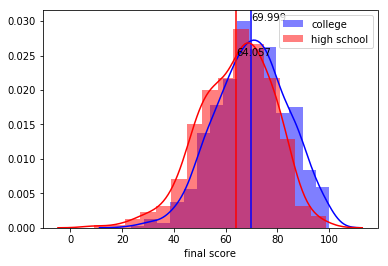

In [8]:
high_school = data.loc[(data.p_edu == 'high school') | (data.p_edu == 'some high school')]
college = data.loc[(data.p_edu != 'high school') & (data.p_edu != 'some high school')]

ax1 = sns.distplot(college.final, axlabel='final score', color='b', hist_kws=dict(alpha=0.5), label='college', bins=15)
plt.axvline(round(college.final.mean(),2), color='b')
ax1.annotate(s=round(college.final.mean(),3), xy=(college.final.mean(), 0.03))
ax2 = sns.distplot(high_school.final, axlabel='final score', color='r', hist_kws=dict(alpha=0.5), label='high school', bins=15)
plt.axvline(round(high_school.final.mean(),2), color='r')
ax2.annotate(s=round(high_school.final.mean(),3), xy=(high_school.final.mean(), 0.025))
plt.legend()

We see that students with parents having college education level has higher final score mean and slightly higher distribution. This implies that parents' education level has affects to students' final score. To make sure this is not a random event, we use bootstraping methods to count p-value.

In [10]:
high_school_mean = high_school.final.mean()
college_mean = college.final.mean()
p_edu_diff = high_school_mean - college_mean

high_school_shifted = high_school.final - high_school_mean + final_mean
college_shifted = college.final - college_mean + final_mean

p_edu_diff_shifted = []
for i in range(3000):
    high_school_samp = high_school_shifted.sample(frac=1, replace=True)
    college_samp = college.sample(frac=1, replace=True)
    p_edu_diff_shifted.append(high_school_samp.mean() - college_samp.mean())
    
p_val = np.sum(np.array(p_edu_diff_shifted) <= p_edu_diff)/len(p_edu_diff_shifted)
conf_int = np.percentile(p_edu_diff_shifted, [2.5, 97.5])
print('p_edu final score different : ', round(p_edu_diff,2))
print('p_edu P-Value : ', round(p_val,4))

p_edu final score different :  -5.94
p_edu P-Value :  0.0027


Under the null hypothesis, they have the same mean. In this case, we get 0,0043 p-value for having mean final score different -5,94. This implies that there is a small chance they have different final score is a random event.

# 3 Conclusion
Based-on this data, there are 3 factors that affect students performance. First, students' lunch. Students with standard lunch have higher final score mean rather than free lunch. Second, test preparation completion. Students who have completed test preparation have higher final score mean rather than who haven't. Third, parents' education level. Students who have parents with college education level have higher final score mean rather than high school education level.